In [100]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
import os

#change path
root_dir = "/content/drive/My Drive/"
base_dir = root_dir + 'kbo'
os.chdir(base_dir)

#mount google driver
#from google.colab import drive
#drive.mount('/content/gdrive', force_remount=True)
#root_dir = "/content/gdrive/My Drive/"

!pwd

/content/drive/My Drive/kbo


#  1장 서울시 구별 CCTV 현황 분석

## 1-2 파이썬에서 텍스트 파일과 엑셀 파일 읽기 - pandas 

In [102]:
import pandas as pd

In [103]:
CCTV_Seoul = pd.read_csv('/content/drive/My Drive/python_Visualization/CCTV_in_Seoul.csv')
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [104]:
# 데이터셋.columns : cloumn 이름 반환
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [105]:
CCTV_Seoul.columns[0]

'기관명'

In [106]:
# rename : column 명 변경
# inplace = True : 실제 데이터셋에 적용
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '구별'}, inplace = True)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [107]:
pop_Seoul = pd.read_excel('/content/drive/My Drive/python_Visualization/population_in_Seoul.xls')
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [108]:
# header = 2 : 세 번째 줄부터 읽기
# usecols = 'B, D, G, J, N' : 해당 열만 읽기
pop_Seoul = pd.read_excel('/content/drive/My Drive/python_Visualization/population_in_Seoul.xls', header = 2,
                          usecols = 'B, D, G, J, N',)
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [109]:
pop_Seoul.rename(columns = {pop_Seoul.columns[0] : '구별',
                            pop_Seoul.columns[1] : '인구수',
                            pop_Seoul.columns[2] : '한국인',
                            pop_Seoul.columns[3] : '외국인',
                            pop_Seoul.columns[4] : '고령자'}, inplace = True)

pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


## 1-3 pandas 기초 익히기

In [110]:
import pandas as pd
import numpy as np

In [111]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [112]:
# 날짜형 데이터 date_range
# periods  = 6 : 6일간
dates = pd.date_range('20130101', periods = 6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [113]:
# DataFrame 유형 데이터
# np.random.randn(6, 4) : 6행 4열의 random 변수 생성
# columns : 칼럼명 지정
# index : 인덱스 데이터 지정

df = pd.DataFrame(np.random.randn(6,4), index = dates, columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
2013-01-01,1.019783,-0.187888,-0.319355,-0.244954
2013-01-02,1.464275,-1.436516,0.464199,0.566953
2013-01-03,-1.922954,-0.269483,-0.490870,-1.071984
2013-01-04,0.713694,0.020069,0.512359,0.591787
2013-01-05,-0.594843,0.249270,-0.109907,0.477324
2013-01-06,0.900914,-0.652406,1.825167,1.593986


In [114]:
df.head(3)

,A,B,C,D
2013-01-01,1.019783,-0.187888,-0.319355,-0.244954
2013-01-02,1.464275,-1.436516,0.464199,0.566953
2013-01-03,-1.922954,-0.269483,-0.490870,-1.071984


In [115]:
# DataFrame의 인덱스 확인
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [116]:
# DataFrame의 columns 확인
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [117]:
# DataFrame의 value 확인
df.values

array([[ 1.01978277, -0.18788802, -0.31935492, -0.24495386],
       [ 1.46427452, -1.43651619,  0.46419908,  0.56695299],
       [-1.92295363, -0.26948347, -0.49086972, -1.07198443],
       [ 0.71369373,  0.0200688 ,  0.51235868,  0.59178661],
       [-0.59484335,  0.2492702 , -0.10990693,  0.47732414],
       [ 0.90091424, -0.65240596,  1.82516708,  1.59398567]])

In [118]:
# DataFrame 개요 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2013-01-01 to 2013-01-06
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


In [119]:
# 통계적 개요 확인 (values 값이 문자여도 확인 가능)
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.263478,-0.379492,0.313599,0.318852
std,1.275941,0.599264,0.845480,0.898825
min,-1.922954,-1.436516,-0.490870,-1.071984
25%,-0.267709,-0.556675,-0.266993,-0.064384
50%,0.807304,-0.228686,0.177146,0.522139
75%,0.990066,-0.031920,0.500319,0.585578
max,1.464275,0.249270,1.825167,1.593986


In [120]:
# sort_values  : by로 지정된 컬럼을 기준으로 정렬
# ascending = False : 내림차순(큰 수 -> 작은 수 = descending)
df.sort_values(by = 'B', ascending = False)

,A,B,C,D
2013-01-05,-0.594843,0.249270,-0.109907,0.477324
2013-01-04,0.713694,0.020069,0.512359,0.591787
2013-01-01,1.019783,-0.187888,-0.319355,-0.244954
2013-01-03,-1.922954,-0.269483,-0.490870,-1.071984
2013-01-06,0.900914,-0.652406,1.825167,1.593986
2013-01-02,1.464275,-1.436516,0.464199,0.566953


In [121]:
# 'A' 열 데이터만 Series로 보여줌
df['A']

2013-01-01    1.019783
2013-01-02    1.464275
2013-01-03   -1.922954
2013-01-04    0.713694
2013-01-05   -0.594843
2013-01-06    0.900914
Freq: D, Name: A, dtype: float64

In [122]:
# 행의 범위 지정
df[0:3]

,A,B,C,D
2013-01-01,1.019783,-0.187888,-0.319355,-0.244954
2013-01-02,1.464275,-1.436516,0.464199,0.566953
2013-01-03,-1.922954,-0.269483,-0.490870,-1.071984


In [123]:
# 행의 값 지정
df['20130101' : '20130103']

,A,B,C,D
2013-01-01,1.019783,-0.187888,-0.319355,-0.244954
2013-01-02,1.464275,-1.436516,0.464199,0.566953
2013-01-03,-1.922954,-0.269483,-0.490870,-1.071984


In [124]:
# df.loc :  특정 범위의 데이터만 보기
df.loc[dates[0]]

A    1.019783
B   -0.187888
C   -0.319355
D   -0.244954
Name: 2013-01-01 00:00:00, dtype: float64

In [125]:
# A,B 열의 모든 행 보기
df.loc[:,['A', 'B']]

,A,B
2013-01-01,1.019783,-0.187888
2013-01-02,1.464275,-1.436516
2013-01-03,-1.922954,-0.269483
2013-01-04,0.713694,0.020069
2013-01-05,-0.594843,0.249270
2013-01-06,0.900914,-0.652406


In [126]:
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,1.464275,-1.436516
2013-01-03,-1.922954,-0.269483
2013-01-04,0.713694,0.020069


In [127]:
df.loc['20130102', ['A', 'B']]

A    1.464275
B   -1.436516
Name: 2013-01-02 00:00:00, dtype: float64

In [128]:
df.loc[dates[0], 'A']

1.019782767160083

In [129]:
# iloc : 행과 열의 번호를 이용해서 데이터에 바로 접근하기
df.iloc[3]

A    0.713694
B    0.020069
C    0.512359
D    0.591787
Name: 2013-01-04 00:00:00, dtype: float64

In [130]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.713694,0.020069
2013-01-05,-0.594843,0.249270


In [131]:
# 특정 조건 만족하는 데이터 구하기
# df['A'] = df[df.A]
df[df.A > 0]

,A,B,C,D
2013-01-01,1.019783,-0.187888,-0.319355,-0.244954
2013-01-02,1.464275,-1.436516,0.464199,0.566953
2013-01-04,0.713694,0.020069,0.512359,0.591787
2013-01-06,0.900914,-0.652406,1.825167,1.593986


In [132]:
# 데이터 전체에서 조건을 걸면 만족하지 않은 곳은 NaN 처리
df[df > 0]

,A,B,C,D
2013-01-01,1.019783,NaN,NaN,NaN
2013-01-02,1.464275,NaN,0.464199,0.566953
2013-01-03,NaN,NaN,NaN,NaN
2013-01-04,0.713694,0.020069,0.512359,0.591787
2013-01-05,NaN,0.249270,NaN,0.477324
2013-01-06,0.900914,NaN,1.825167,1.593986


In [133]:
# 데이터 내용 복사
df2 = df.copy()
df2.head()

,A,B,C,D
2013-01-01,1.019783,-0.187888,-0.319355,-0.244954
2013-01-02,1.464275,-1.436516,0.464199,0.566953
2013-01-03,-1.922954,-0.269483,-0.490870,-1.071984
2013-01-04,0.713694,0.020069,0.512359,0.591787
2013-01-05,-0.594843,0.249270,-0.109907,0.477324


In [134]:
# DataFrame에서 새로운 컬럼 추가
df2['E'] = ['one', 'one', 'two', 'three', 'four','three']
df2

,A,B,C,D,E
2013-01-01,1.019783,-0.187888,-0.319355,-0.244954,one
2013-01-02,1.464275,-1.436516,0.464199,0.566953,one
2013-01-03,-1.922954,-0.269483,-0.490870,-1.071984,two
2013-01-04,0.713694,0.020069,0.512359,0.591787,three
2013-01-05,-0.594843,0.249270,-0.109907,0.477324,four
2013-01-06,0.900914,-0.652406,1.825167,1.593986,three


In [135]:
# 해당 컬럼에 two, four가 있는지 조건 걸고 싶을 때 isin 사용
df2['E'].isin(['two', 'four'])

2013-01-01    False
2013-01-02    False
2013-01-03     True
2013-01-04    False
2013-01-05     True
2013-01-06    False
Freq: D, Name: E, dtype: bool

In [136]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,-1.922954,-0.269483,-0.490870,-1.071984,two
2013-01-05,-0.594843,0.249270,-0.109907,0.477324,four


In [137]:
# 통계 데이터 구하기 위해선 apply 함수 사용하기
# numpy의 cumsum : 누적합
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,1.019783,-0.187888,-0.319355,-0.244954
2013-01-02,2.484057,-1.624404,0.144844,0.321999
2013-01-03,0.561104,-1.893888,-0.346026,-0.749985
2013-01-04,1.274797,-1.873819,0.166333,-0.158199
2013-01-05,0.679954,-1.624549,0.056426,0.319125
2013-01-06,1.580868,-2.276955,1.881593,1.913111


In [138]:
# 최대값과 최소값의 차이(거리) 구하기
# one-line함수인 lambda 이용

df.apply(lambda x:x.max() - x.min())

A    3.387228
B    1.685786
C    2.316037
D    2.665970
dtype: float64

## 1-4 pandas 이용해서 CCTV와 인구 현황 데이터 파악하기

In [139]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [140]:
# ascending = True : 오름차순(작은 수 -> 큰 수)
CCTV_Seoul.sort_values(by = '소계', ascending = True).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [141]:
CCTV_Seoul.sort_values(by='소계', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [142]:
# 최근 3년간 CCTV 증가율 계산
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년']+CCTV_Seoul['2015년']+CCTV_Seoul['2014년'] / CCTV_Seoul['2013년도 이전'] * 100)
CCTV_Seoul.sort_values(by = '최근증가율', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,1549.281734
4,관악구,1496,846,260,390,613,1033.732861
8,노원구,1265,542,57,451,516,977.516605
22,종로구,1002,464,314,211,630,908.672414
10,동대문구,1294,1070,23,198,579,779.149533


In [143]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [144]:
# drop : 행을 지우는 명령
pop_Seoul.drop([0], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [145]:
# unique : 반복된 데이터는 하나로 나타내서 한 번 이상 나타난 데이터 확인
pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [146]:
# isnull : NaN 데이터 추출
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [147]:
pop_Seoul.drop([26], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [148]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [149]:
pop_Seoul.sort_values(by = '인구수', ascending = False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [150]:
pop_Seoul.sort_values(by = '외국인', ascending = False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [151]:
pop_Seoul.sort_values(by = '외국인비율', ascending = False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [152]:
pop_Seoul.sort_values(by = '고령자', ascending = False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [153]:
pop_Seoul.sort_values(by = '고령자비율', ascending = False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


## 1-5 pandas 고급 기능 - 두 DataFrame 병합하기

In [154]:
df1 = pd.DataFrame({'A' : ['A0', 'A1', 'A2', 'A3'],
                    'B' : ['B0', 'B1', 'B2', 'B3'],
                    'C' : ['C0', 'C1', 'C2', 'C3'],
                    'D' : ['D0', 'D1', 'D2', 'D3']},
                   index = [0,1,2,3])

df2 = pd.DataFrame({'A' : ['A4', 'A5', 'A6','A7'],
                    'B' : ['B4', 'B5', 'B6', 'B7'],
                    'C' : ['C4', 'C5', 'C6', 'C7'],
                    'D' : ['D4', 'D5', 'D6', 'D7']},
                   index = [4,5,6,7])

df3 = pd.DataFrame({'A' : ['A8', 'A9', 'A10','A11'],
                    'B' : ['B8', 'B9', 'B10', 'B11'],
                    'C' : ['C8', 'C9', 'C10', 'C11'],
                    'D' : ['D8', 'D9', 'D10', 'D11']},
                   index = [8, 9, 10, 11])

In [155]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [156]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [157]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [158]:
# concat : 열 방향으로 합침
result = pd.concat([df1, df2, df3])
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [159]:
# keys : 다중 index
result = pd.concat([df1, df2, df3], keys=['x', 'y', 'z'])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [160]:
result.index

MultiIndex([('x',  0),
            ('x',  1),
            ('x',  2),
            ('x',  3),
            ('y',  4),
            ('y',  5),
            ('y',  6),
            ('y',  7),
            ('z',  8),
            ('z',  9),
            ('z', 10),
            ('z', 11)],
           )

In [161]:
result.index.get_level_values(0)

Index(['x', 'x', 'x', 'x', 'y', 'y', 'y', 'y', 'z', 'z', 'z', 'z'], dtype='object')

In [162]:
result.index.get_level_values(1)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [163]:
df4 = pd.DataFrame({'B' : ['B2', 'B3', 'B6', 'B7'],
                    'D' : ['D2', 'D3', 'D6', 'D7'],
                    'F' : ['F2', 'F3', 'F6', 'F7']},
                   index=[2,3,6,7])

# concat : index를 기준으로 데이터 합침
# 값을 가질 수 없는 곳에는 NaN 저장
result = pd.concat([df1, df4], axis = 1)

In [164]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [165]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [166]:
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [167]:
# join = 'inner' : 공통된 index로 합치고, 공통되지 않은 index의 데이터는 버리기

result = pd.concat([df1, df4], axis = 1, join = 'inner')
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [168]:
# join_axes=[df1.index] 옵션으로 df1의 인덱스에 맞추기

#result = pd.concat([df1, df4], axis = 1, join_axes=[df1.index])
#result

In [169]:
# ignore_index = True :  두 데이터의 index 무시하고 합친 후 다시 index 부여
result = pd.concat([df1, df4], ignore_index=True)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [170]:
left = pd.DataFrame({'key' : ['k0', 'k4', 'k2', 'k3'],
                     'A' : ['A0', 'A1', 'A2', 'A3'],
                     'B' : ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key':['k0', 'k1', 'k2', 'k3'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D' : ['D0', 'D1', 'D2' ,'D3']})

In [171]:
left

,key,A,B
0,k0,A0,B0
1,k4,A1,B1
2,k2,A2,B2
3,k3,A3,B3


In [172]:
right

,key,C,D
0,k0,C0,D0
1,k1,C1,D1
2,k2,C2,D2
3,k3,C3,D3


In [173]:
# merge : 공통으로 있는 컬럼인 key를 기준으로 합치기 (on 옵션)
pd.merge(left, right, on = 'key')

,key,A,B,C,D
0,k0,A0,B0,C0,D0
1,k2,A2,B2,C2,D2
2,k3,A3,B3,C3,D3


In [174]:
# how 옵션으로 한쪽 데이터를 설정
pd.merge(left, right, how = 'left', on = 'key')

,key,A,B,C,D
0,k0,A0,B0,C0,D0
1,k4,A1,B1,NaN,NaN
2,k2,A2,B2,C2,D2
3,k3,A3,B3,C3,D3


In [175]:
pd.merge(left, right, how = 'right', on = 'key')

,key,A,B,C,D
0,k0,A0,B0,C0,D0
1,k2,A2,B2,C2,D2
2,k3,A3,B3,C3,D3
3,k1,NaN,NaN,C1,D1


In [176]:
# outer : merge한 데이터 결과를 모두 가지는 옵션
# 합집합, 공통된 요소가 아닌 곳은 NaN 처리
pd.merge(left, right, how = 'outer', on = 'key')

,key,A,B,C,D
0,k0,A0,B0,C0,D0
1,k4,A1,B1,NaN,NaN
2,k2,A2,B2,C2,D2
3,k3,A3,B3,C3,D3
4,k1,NaN,NaN,C1,D1


In [178]:
# inner : 교집합, 공통된 요소만 가짐
pd.merge(left, right, how = 'inner', on = 'key')

,key,A,B,C,D
0,k0,A0,B0,C0,D0
1,k2,A2,B2,C2,D2
2,k3,A3,B3,C3,D3


## 1-6 CCTV 데이터와 인구 현황 데이터를 합치고 분석하기

In [179]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on = '구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,1549.281734,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,558.121372,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,374.520325,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,331.494845,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,1033.732861,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [180]:
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1549.281734,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,558.121372,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,374.520325,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,331.494845,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,1033.732861,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [181]:
# set_index : column 중 인덱스로 설정하기
data_result.set_index('구별', inplace = True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,1549.281734,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,558.121372,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,374.520325,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,331.494845,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,1033.732861,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [182]:
# 상관계수 측정
# np. corrcoef : 0.7이하 뚜렷한 상관관계 / 0.3 이하 약한 상관관계 / 0.1 이하 무상관

np.corrcoef(data_result['고령자비율'], data_result['소계'])  # 약한 음의 상관관계

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [183]:
np.corrcoef(data_result['외국인비율'], data_result['소계']) # 무 상관

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [184]:
np.corrcoef(data_result['인구수'], data_result['소계']) # 약한 상관관계

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

In [185]:
data_result.sort_values(by='소계', ascending = False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,1549.281734,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,504.704829,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,745.166430,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
은평구,1873,765.683656,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
용산구,1624,525.935673,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [187]:
data_result.sort_values(by = '인구수', ascending = False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,618,534.969754,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,884,331.494845,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,2780,1549.281734,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1265,977.516605,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,1496,1033.732861,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


## 1-7 파이썬의 대표 시각화 도구 - Matplotlib

In [188]:
import matplotlib.pyplot as plt
%matplotlib inline

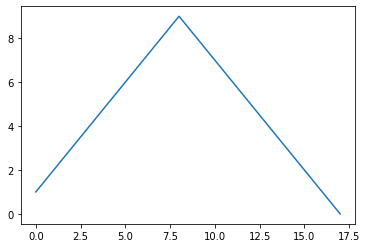

In [191]:
plt.figure
plt.plot([1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1,0])
plt.show()

In [192]:
import numpy as np
t = np.arange(0, 12, 0.01)
y = np.sin(t)

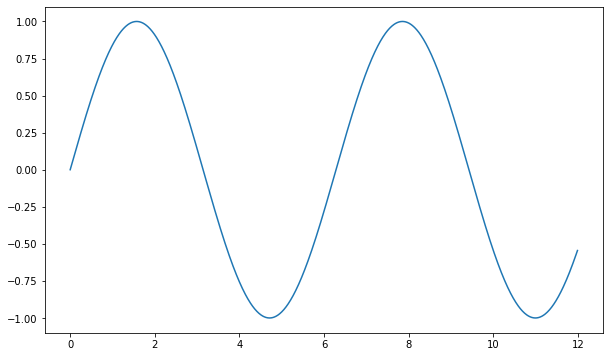

In [193]:
plt.figure(figsize=(10,6))
plt.plot(t, y)
plt.show()

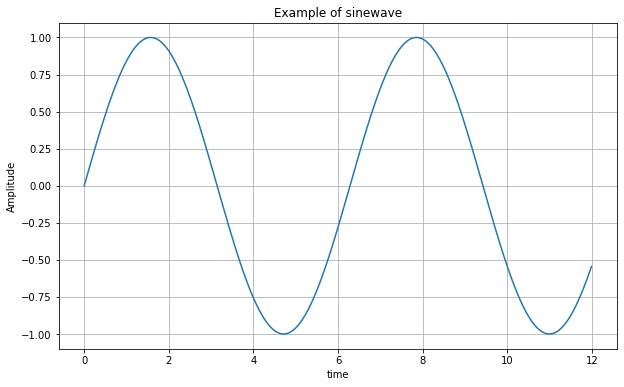

In [195]:
plt.figure(figsize=(10, 6))
plt.plot(t, y)
plt.grid()  # 격자 무늬 
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

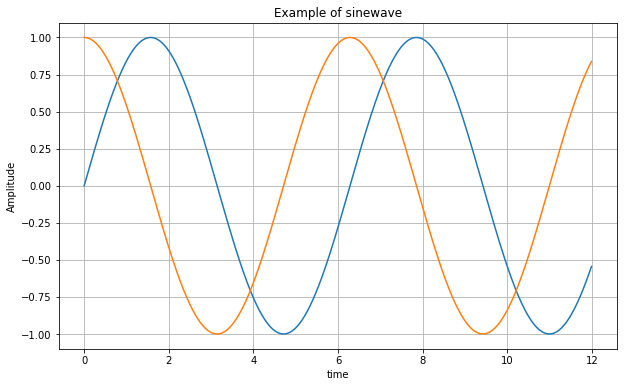

In [196]:
plt.figure(figsize=(10, 6))
plt.plot(t, np.sin(t))  # plot 명령 두 개 넣어서 그래프 2개 생성
plt.plot(t, np.cos(t))
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

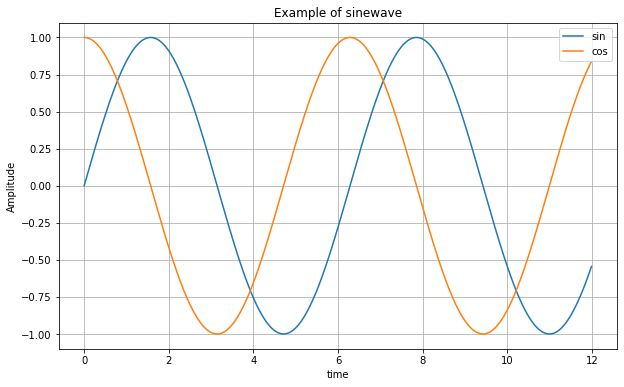

In [197]:
plt.figure(figsize=(10, 6))
plt.plot(t, np.sin(t),label='sin')   # 범례 추가 위해 label = '텍스트' 
plt.plot(t, np.cos(t), label='cos')
plt.grid()
plt.legend()   # 범례 추가
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

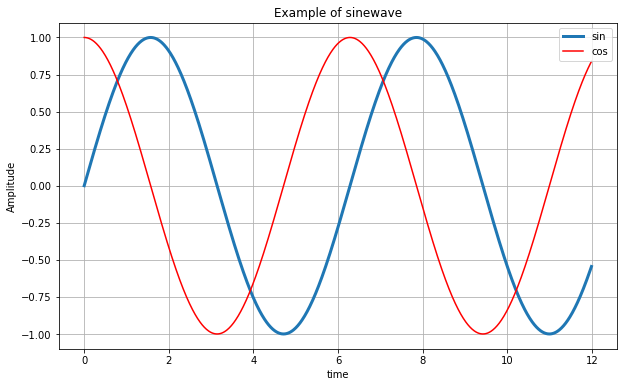

In [198]:
plt.figure(figsize=(10, 6))
plt.plot(t, np.sin(t),lw = 3,label='sin')    # lw : 선의 굵기
plt.plot(t, np.cos(t), 'r',label='cos')      # color : 색상 지정
plt.grid()
plt.legend()  
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

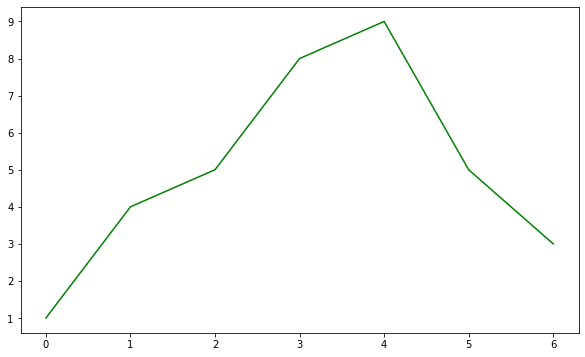

In [199]:
t = [0,1,2,3,4,5,6]
y = [1,4,5,8,9,5,3]
plt.figure(figsize=(10, 6))
plt.plot(t, y, color = 'green')
plt.show()

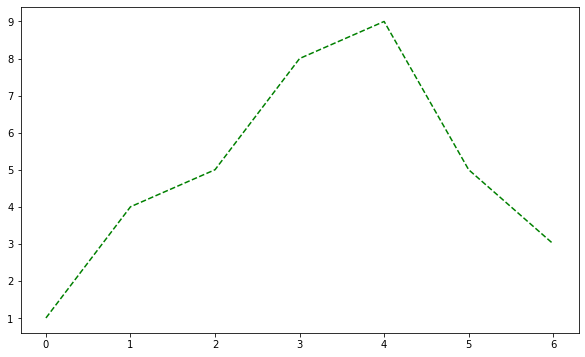

In [200]:
plt.figure(figsize=(10,6))
plt.plot(t, y, color = 'green', linestyle='dashed') # 선 스타일 지정 
plt.show()

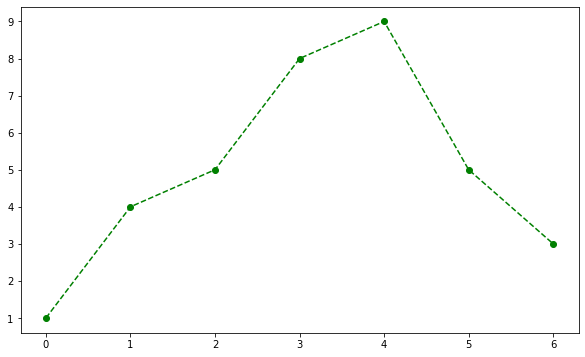

In [201]:
plt.figure(figsize=(10, 6))
plt.plot(t, y, color = 'green', linestyle='dashed', marker='o') # 데이터가 존재하는 곳에 마킹
plt.show()

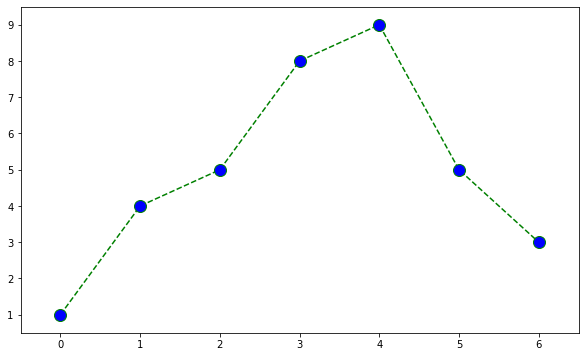

In [203]:
plt.figure(figsize=(10, 6))
plt.plot(t, y, color = 'green', linestyle='dashed', marker='o',
         markerfacecolor = 'blue', markersize = 12) #markerfacecolor : 마커 색상 / markersize : 마커 크기 
plt.xlim([-0.5, 6.5])
plt.ylim([0.5, 9.5])
plt.show()

In [204]:
t = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([9,8,7,9,8,3,2,4,3,4])

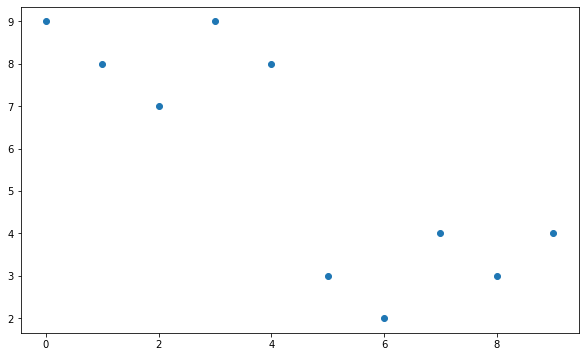

In [205]:
plt.figure(figsize=(10, 6))
plt.scatter(t, y)
plt.show()

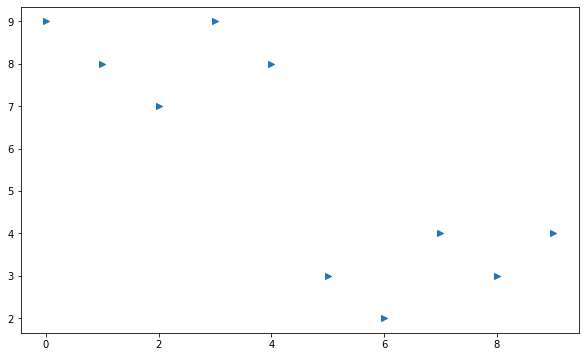

In [206]:
plt.figure(figsize=(10, 6))
plt.scatter(t, y, marker='>') # marker 지정
plt.show()

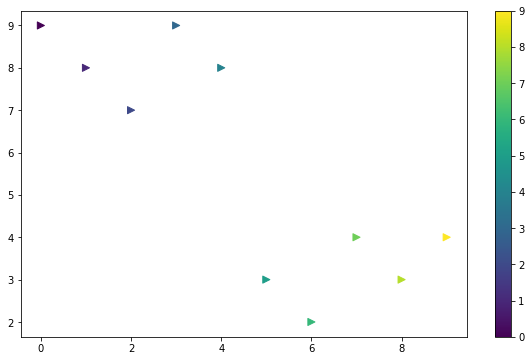

In [207]:
# x축 값인 t에 따라 색상을 바꾸는 color map 지정
# s 옵션 : 마커의 크기

colormap = t

plt.figure(figsize=(10, 6))
plt.scatter(t, y, s = 50, c = colormap, marker='>')
plt.colorbar()
plt.show()

In [208]:
s1 = np.random.normal(loc = 0, scale = 1, size = 1000)
s2 = np.random.normal(loc = 5, scale = 0.5, size = 1000)
s3 = np.random.normal(loc = 10, scale = 2, size = 1000)

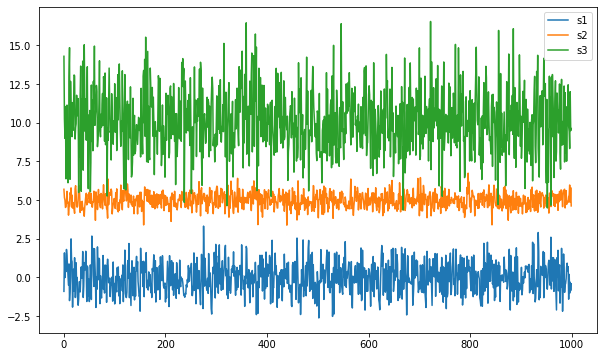

In [209]:
plt.figure(figsize = (10, 6))
plt.plot(s1, label = 's1')
plt.plot(s2, label = 's2')
plt.plot(s3, label = 's3')
plt.legend()
plt.show()

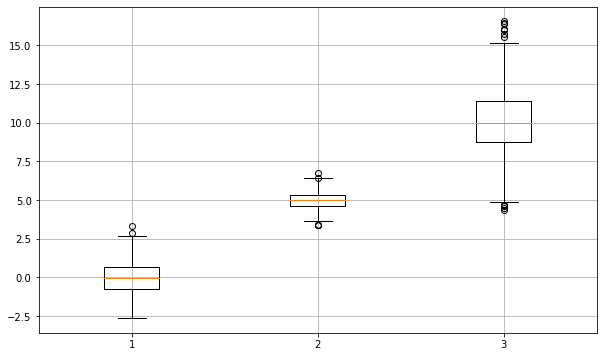

In [211]:
plt.figure(figsize=(10, 6))
plt.boxplot((s1, s2, s3))
plt.grid()
plt.show()